In this notebook, we examine the vorticity budget terms in different filtered deg ranges, e.g. $1^{\circ}-2^{\circ}$, $2^{\circ}-3^{\circ}$ and so on. We then compare the same against SSH, SST and SSS patterns. The idea is to identify if vorticity budget analyses can tell us something about regional variability.

In [1]:
import xarray as xr
import numpy as np
from xgcm import Grid
import xesmf as xe
import gcm_filters
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [19]:
def plot_sec(ax, da, vmin=-999, vmax=999, vstep=1, lat_lon_ext = [-180, 180, -85., 85.],
             lon='geolon', lat='geolat', cmap='RdBu_r', title='what is it?'):
    
    #contours = np.arange(vmin, vmax+vstep, vstep)
    
    p = da.plot(ax=ax, x=lon, y=lat, vmin=vmin, vmax=vmax, cmap=cmap, 
                transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False)
    
    # add separate colorbar
    cb = plt.colorbar(p, ax=ax, extend='both', orientation="horizontal", shrink=0.6)
    cb.ax.tick_params(labelsize=12)
    
    ax.set_extent(lat_lon_ext, crs=ccrs.PlateCarree())
    
    # parallels/meridiens
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(-80,81,20))
    #gl.xlocator = mticker.FixedLocator(np.arange(-170,180,60))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12, 'color': 'black'}
    gl.ylabel_style = {'size': 12, 'color': 'black'}
    
    #ax.set_adjustable('datalim')
    
    ax.set_aspect(1.0)

    #p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    
    _ = plt.title(title, fontsize=14)
    return fig

In [3]:
# Read Data

ppdir = "/archive/Hemant.Khatri/MOM_Budget/OM4p25_JRA55/v3_FW_adjust_True/Filter_Data/"

ds = xr.open_dataset(ppdir + "OMp25_JRA55_Vorticity_Guassian_Fixed_Factor.nc")
ds1 =  xr.open_dataset(ppdir + "OMp25_JRA55_Tracer_Guassian_Fixed_Factor.nc")
ds = xr.merge([ds, ds1])

print(ds)

<xarray.Dataset>
Dimensions:    (filter: 10, season: 4, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xq         (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq         (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
    geolat_c   (yq, xq) float64 ...
    geolon_c   (yq, xq) float64 ...
  * filter     (filter) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * xh         (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh         (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
    geolat     (yh, xh) float64 ...
    geolon     (yh, xh) float64 ...
Data variables:
    beta_V     (filter, season, yq, xq) float64 ...
    BPT        (filter, season, yq, xq) float64 ...
    Mass_flux  (filter, season, yq, xq) float64 ...
    eta_dt     (filter, season, yq, xq) float64 ...
    Curl_dudt  (filter, season, yq, xq) float64 ...
    Curl_taus  (filter, season, 

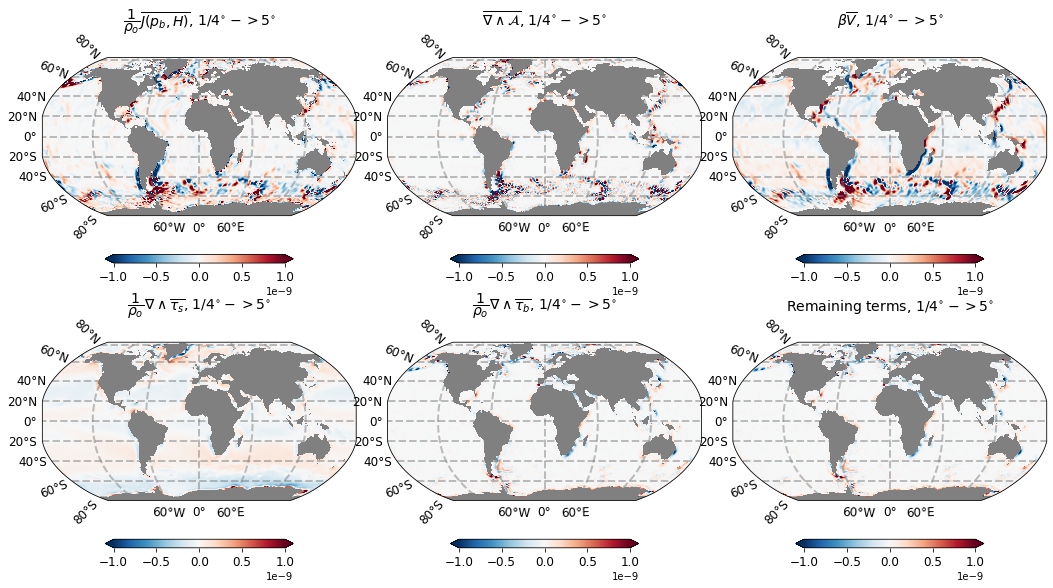

In [9]:
# Global map 1/4 deg

max_r = 1.e-9
max_r1 = 1.e-9

grid1 = plt.GridSpec(2, 3, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[18,10])

lat_lon_ext = [-180, 180, -85., 85.]

d25_5D = ds.isel(filter=4).mean('season').isel(yq=slice(0,1079))

BPT1 = d25_5D['BPT']
ax = fig.add_subplot(grid1[0, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_sec(ax, BPT1, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\dfrac{1}{\rho_o}\overline{J(p_b, H)}$, $1/4^{\circ} -> 5^{\circ}$')

ax = fig.add_subplot(grid1[0, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_sec(ax, d25_5D['Curl_Adv'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\overline{\nabla \wedge \mathcal{A}}$, $1/4^{\circ} -> 5^{\circ}$')

beta_V = d25_5D['beta_V'] 
ax = fig.add_subplot(grid1[0, 2], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_sec(ax, beta_V, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\beta \overline{V}$, $1/4^{\circ} -> 5^{\circ}$')


ax = fig.add_subplot(grid1[1, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_sec(ax, d25_5D['Curl_taus'], vmin=-max_r1, vmax=max_r1, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\dfrac{1}{\rho_o}\nabla \wedge\overline{{\tau_s}}$, $1/4^{\circ} -> 5^{\circ}$')

ax = fig.add_subplot(grid1[1, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_sec(ax, d25_5D['Curl_taub'], vmin=-max_r1, vmax=max_r1, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\dfrac{1}{\rho_o}\nabla \wedge\overline{{\tau_b}}$, $1/4^{\circ} -> 5^{\circ}$')

tmp = d25_5D['Curl_diff'] + d25_5D['Mass_flux'] + d25_5D['eta_dt'] + d25_5D['Curl_dudt']
ax = fig.add_subplot(grid1[1, 2], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_sec(ax, d25_5D['Curl_taub'], vmin=-max_r1, vmax=max_r1, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'Remaining terms, $1/4^{\circ} -> 5^{\circ}$')

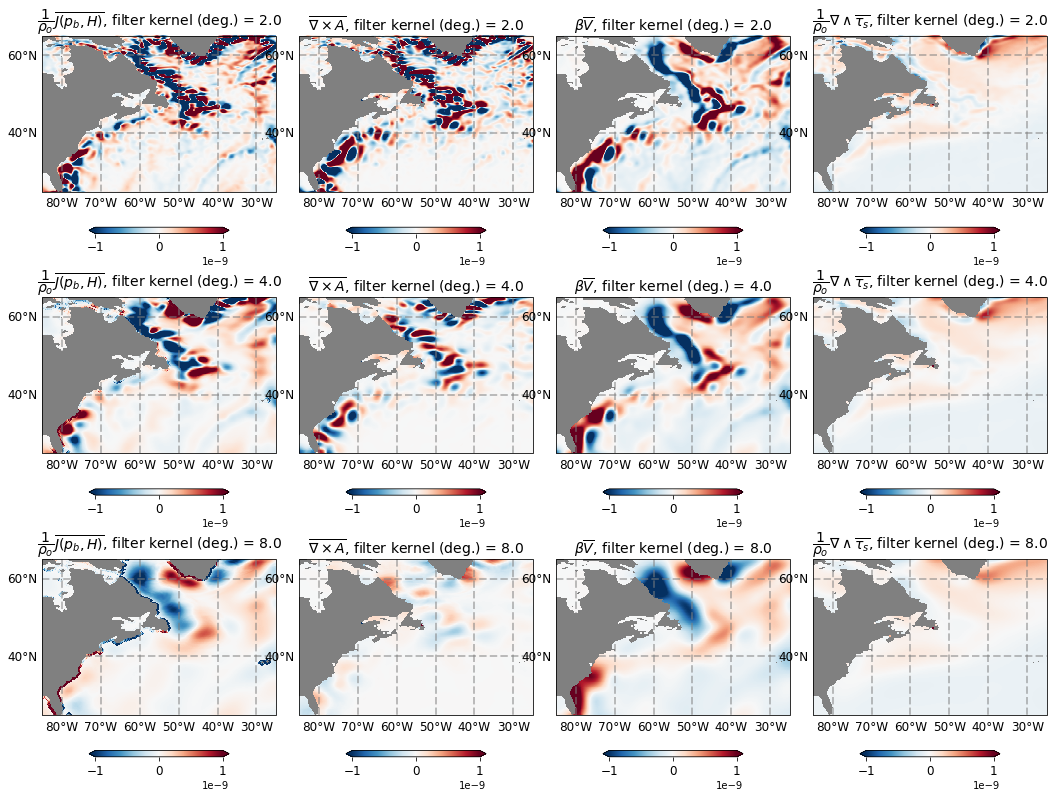

In [13]:
# North Atlantic map 1/4 deg

max_r = 1.e-9
max_r1 = 1.e-9

grid1 = plt.GridSpec(3, 4, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[18,14])

lat_lon_ext = [-85., -25., 25., 65.]

filt_ind = [1, 3, 7]

for i in range(0, 3):
    
    j = filt_ind[i]
    
    tmp = ds['BPT'].isel(filter=j).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 0], projection=ccrs.PlateCarree(),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\dfrac{1}{\rho_o}\overline{J(p_b, H)}$, filter kernel (deg.) = ' + str(ds.filter.values[j]))

    tmp = ds['Curl_Adv'].isel(filter=j).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 1], projection=ccrs.PlateCarree(),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\overline{\nabla \times A}$, filter kernel (deg.) = ' + str(ds.filter.values[j]))
    
    tmp = ds['beta_V'].isel(filter=j).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 2], projection=ccrs.PlateCarree(),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\beta\overline{V}$, filter kernel (deg.) = ' + str(ds.filter.values[j]))
    
    tmp = ds['Curl_taus'].isel(filter=j).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 3], projection=ccrs.PlateCarree(),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r1, vmax=max_r1, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\dfrac{1}{\rho_o}\nabla \wedge\overline{{\tau_s}}$, filter kernel (deg.) = ' + str(ds.filter.values[j]))

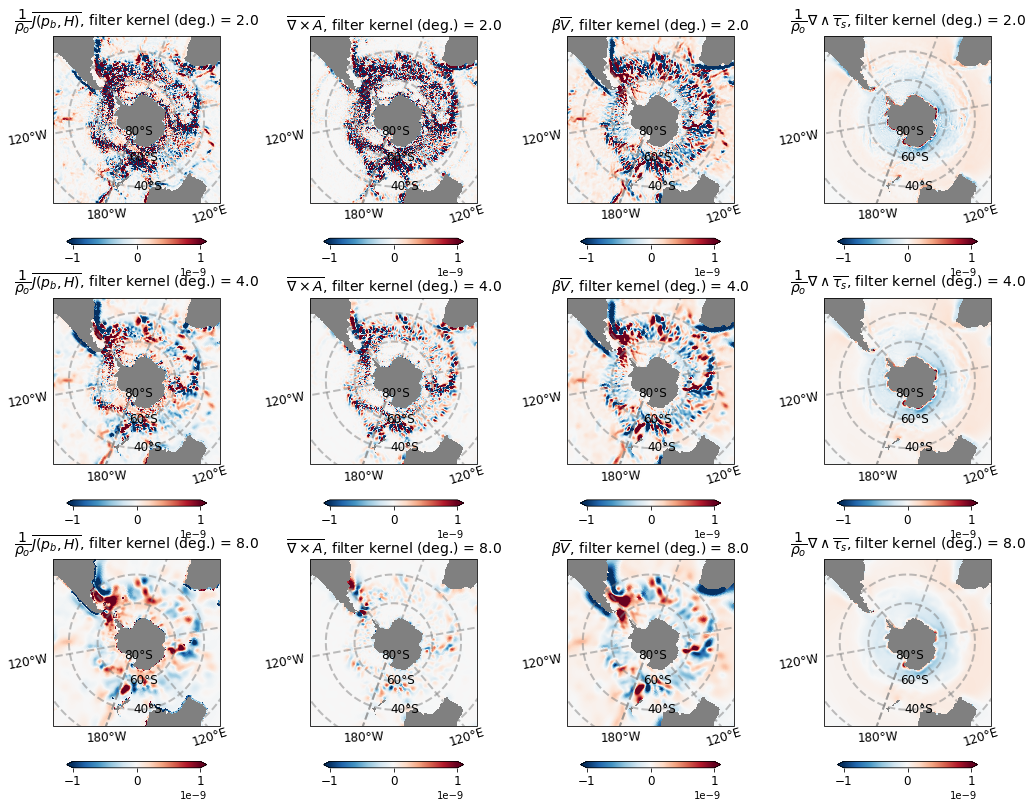

In [14]:
# Southern Ocean map 1/4 deg

max_r = 1.e-9
max_r1 = 1.e-9

grid1 = plt.GridSpec(3, 4, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[18,14])

lat_lon_ext = [-180, 180, -90, -30]

filt_ind = [1, 3, 7]

for i in range(0, 3):
    
    j = filt_ind[i]
    
    tmp = ds['BPT'].isel(filter=j).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 0], projection=ccrs.SouthPolarStereo(central_longitude=-20.0),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\dfrac{1}{\rho_o}\overline{J(p_b, H)}$, filter kernel (deg.) = ' + str(ds.filter.values[j]))

    tmp = ds['Curl_Adv'].isel(filter=j).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 1], projection=ccrs.SouthPolarStereo(central_longitude=-20.0),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\overline{\nabla \times A}$, filter kernel (deg.) = ' + str(ds.filter.values[j]))
    
    tmp = ds['beta_V'].isel(filter=j).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 2], projection=ccrs.SouthPolarStereo(central_longitude=-20.0),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\beta\overline{V}$, filter kernel (deg.) = ' + str(ds.filter.values[j]))
    
    tmp = ds['Curl_taus'].isel(filter=j).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 3], projection=ccrs.SouthPolarStereo(central_longitude=-20.0),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r1, vmax=max_r1, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\dfrac{1}{\rho_o}\nabla \wedge\overline{{\tau_s}}$, filter kernel (deg.) = ' + str(ds.filter.values[j]))

#### Domain-averaged analysis

We asses how the vorticity budget behaves in different range of scales in low latitudes and higher latitudes. For simlicity, we choose three regions, 40$^{\circ}$N$-90^{\circ}$N, 90$^{\circ}$S$-40^{\circ}$S, 40$^{\circ}$S$-40^{\circ}$S.

In order to analyse the domain-integrated budgets in different regions, we compute regional mean variances of the vorticity budget terms. Note that the sign of these budget terms fluctuates a lot; thus similly using domain-mean values may not give the right baalnces.  



For future analysis we will 6 regions, i.e. North Atlantic (40$^{\circ}$N$-90^{\circ}$N, 100$^{\circ}$W$-30^{\circ}$E), Central Atlantic (40$^{\circ}$S$-40^{\circ}$N, 100$^{\circ}$W$-30^{\circ}$E), North Pacific (40$^{\circ}$N$-90^{\circ}$N, 120$^{\circ}$E$-100^{\circ}$W), Central Pacific (40$^{\circ}$S$-40^{\circ}$N, 120$^{\circ}$E$-100^{\circ}$W), Indian Ocean (40$^{\circ}$N$-90^{\circ}$N, 30$^{\circ}$E$-120^{\circ}$E), Southern Ocean (90$^{\circ}$S$-40^{\circ}$S). This approach would require us to create wet mask field for each of the regions.

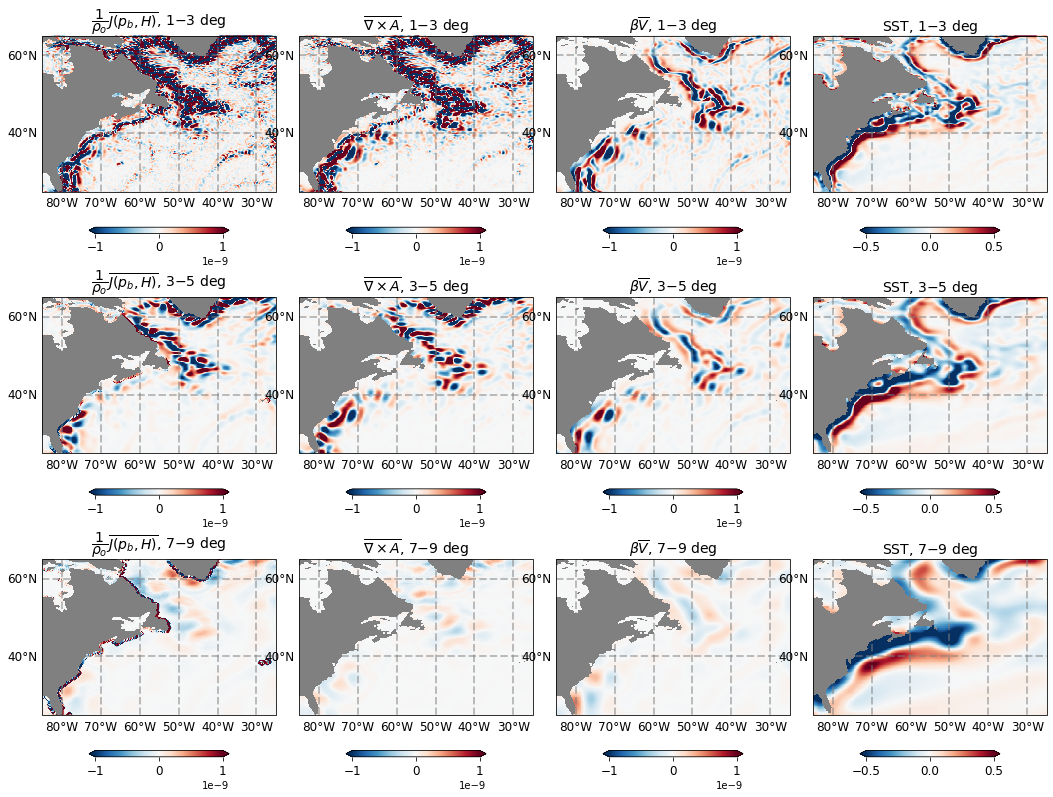

In [27]:
# North Atlantic map 1/4 deg (in scale ranges)

max_r = 1.e-9
max_r1 = 0.5

grid1 = plt.GridSpec(3, 4, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[18,14])

lat_lon_ext = [-85., -25., 25., 65.]

filt_ind = [1, 3, 7]

for i in range(0, 3):
    
    j = filt_ind[i]
    
    tmp = (ds['BPT'].isel(filter=j-1) - ds['BPT'].isel(filter=j+1)).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 0], projection=ccrs.PlateCarree(),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\dfrac{1}{\rho_o}\overline{J(p_b, H)}$, ' 
                 + str(int(ds.filter.values[j-1])) + '$-$' + str(int(ds.filter.values[j+1])) + ' deg')

    tmp = (ds['Curl_Adv'].isel(filter=j-1) - ds['Curl_Adv'].isel(filter=j+1)).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 1], projection=ccrs.PlateCarree(),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\overline{\nabla \times A}$, '
                 + str(int(ds.filter.values[j-1])) + '$-$' + str(int(ds.filter.values[j+1])) + ' deg')
    
    tmp = (ds['beta_V'].isel(filter=j-1) - ds['beta_V'].isel(filter=j+1)).mean('season').isel(yq=slice(0,1079))
    ax = fig.add_subplot(grid1[i, 2], projection=ccrs.PlateCarree(),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon_c', lat='geolat_c', cmap='RdBu_r', 
                 title=r'$\beta\overline{V}$, '
                 + str(int(ds.filter.values[j-1])) + '$-$' + str(int(ds.filter.values[j+1])) + ' deg')
    
    tmp = (ds['tos'].isel(filter=j-1) - ds['tos'].isel(filter=j+1)).mean('season')
    ax = fig.add_subplot(grid1[i, 3], projection=ccrs.PlateCarree(),facecolor='grey')
    _ = plot_sec(ax, tmp, vmin=-max_r1, vmax=max_r1, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                 lon='geolon', lat='geolat', cmap='RdBu_r', 
                 title=r'SST, '
                 + str(int(ds.filter.values[j-1])) + '$-$' + str(int(ds.filter.values[j+1])) + ' deg')

####  Line Plots for budget variance

In [47]:
# diff takes difference along filter direction. E.g., filter=0 in tmp_variables = 2deg - 1deg

tmp_betaV = ds['beta_V'].diff('filter')
tmp_BPT = (ds['BPT'].diff('filter'))
tmp_Qm = (ds['Mass_flux'].diff('filter'))
tmp_Adv = (ds['Curl_Adv'].diff('filter'))
tmp_taus = (ds['Curl_taus'].diff('filter'))
tmp_taub = (ds['Curl_taub'].diff('filter'))
tmp_diff = (ds['Curl_diff'].diff('filter'))
tmp_etadt = (ds['eta_dt'].diff('filter'))
tmp_dudt = (ds['Curl_dudt'].diff('filter'))

tmp_zos = (ds['zos'].diff('filter'))
tmp_tos = (ds['tos'].diff('filter'))
tmp_sos = (ds['sos'].diff('filter'))

plt_ds = xr.merge([tmp_betaV, tmp_BPT, tmp_Qm, tmp_Adv, tmp_taus, tmp_taub, tmp_diff, tmp_etadt, tmp_dudt, 
                  tmp_zos, tmp_tos, tmp_sos])

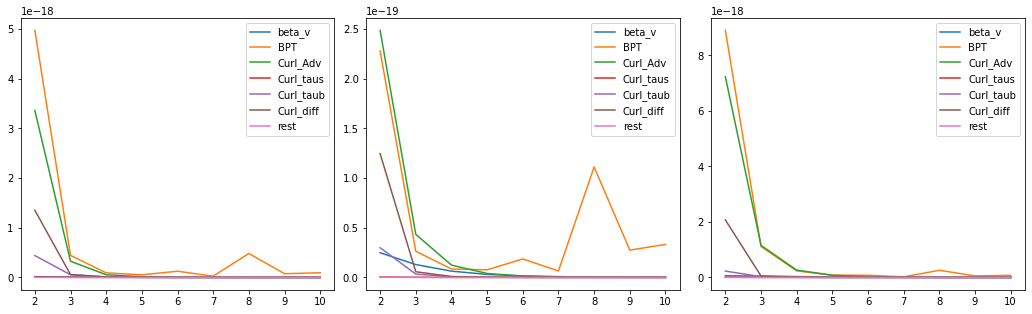

In [53]:
grid1 = plt.GridSpec(1, 3, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[18,5])

leg = ['beta_v', 'BPT', 'Curl_Adv', 'Curl_taus', 'Curl_taub', 'Curl_diff', 'rest']
for i in range(0,3):
    
    t1 = tmp_betaV
    
    if(i==0):
        tmp_ds = plt_ds.sel(yh = slice(40., 90.), yq = slice(40., 90.)).mean('season')
    elif(i==1):
        tmp_ds = plt_ds.sel(yh = slice(-40., 40.), yq = slice(-40., 40.)).mean('season')
    else:
        tmp_ds = plt_ds.sel(yh = slice(-90., -40.), yq = slice(-90., -40.)).mean('season')
    
    ax = fig.add_subplot(grid1[0, i])
    
    plt.plot(tmp_ds.filter, (tmp_ds['beta_V'] * tmp_ds['beta_V']).mean(['xq', 'yq']))
    plt.plot(tmp_ds.filter, (tmp_ds['BPT']*tmp_ds['BPT']).mean(['xq', 'yq']))
    plt.plot(tmp_ds.filter, (tmp_ds['Curl_Adv']*tmp_ds['Curl_Adv']).mean(['xq', 'yq']))
    plt.plot(tmp_ds.filter, (tmp_ds['Curl_taus']*tmp_ds['Curl_taus']).mean(['xq', 'yq']))
    plt.plot(tmp_ds.filter, (tmp_ds['Curl_taub']*tmp_ds['Curl_taub']).mean(['xq', 'yq']))
    plt.plot(tmp_ds.filter, (tmp_ds['Curl_diff']*tmp_ds['Curl_diff']).mean(['xq', 'yq']))
    plt.plot(tmp_ds.filter, ((tmp_ds['Curl_dudt'] + tmp_ds['eta_dt'] + tmp_ds['Mass_flux'])*
                            (tmp_ds['Curl_dudt'] + tmp_ds['eta_dt'] + tmp_ds['Mass_flux'])).mean(['xq', 'yq']))
    
    plt.legend(leg)

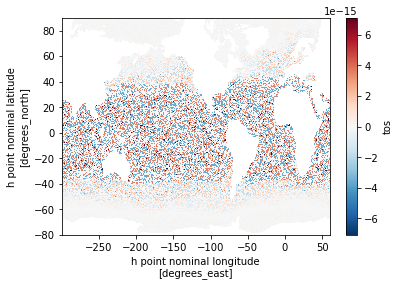

In [44]:
(tmp.isel(filter=0).mean('season') - ds['tos'].isel(filter=1).mean('season') + ds['tos'].isel(filter=0).mean('season')).plot()

In [48]:
plt_ds

<xarray.Dataset>
Dimensions:    (filter: 9, season: 4, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xq         (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq         (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
    geolat_c   (yq, xq) float64 -79.77 -79.77 -79.77 ... 64.28 64.17 64.06
    geolon_c   (yq, xq) float64 -299.6 -299.4 -299.1 ... -300.0 -300.0 -300.0
  * filter     (filter) float64 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * xh         (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh         (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
    geolat     (yh, xh) float64 -79.81 -79.81 -79.8 -79.8 ... 64.33 64.22 64.11
    geolon     (yh, xh) float64 -299.7 -299.5 -299.2 -299.0 ... 60.0 60.0 60.0
Data variables:
    beta_V     (filter, season, yq, xq) float64 nan nan nan nan ... nan nan nan
    BPT        (filter, season, yq, xq) float64 nan nan nan nan ... nan nan nan
    Mass_flux  (filter, season, yq, xq) float64 nan nan nan nan ... nan nan nan
    Curl_Adv   (filter, season, yq, xq) float64 nan nan nan nan ... nan nan nan
    Curl_taus  (filter, season, yq, xq) float64 nan nan nan nan ... nan nan nan
    Curl_taub  (filter, season, yq, xq) float64 nan nan nan nan ... nan nan nan
    Curl_diff  (filter, season, yq, xq) float64 nan nan nan nan ... nan nan nan
    eta_dt     (filter, season, yq, xq) float64 nan nan nan nan ... nan nan nan
    Curl_dudt  (filter, season, yq, xq) float64 nan nan nan nan ... nan nan nan
    zos        (filter, season, yh, xh) float64 nan nan nan nan ... nan nan nan
    tos        (filter, season, yh, xh) float64 nan nan nan nan ... nan nan nan
    sos        (filter, season, yh, xh) float64 nan nan nan nan ... nan nan nan